In [106]:
import mysql.connector
from mysql.connector import errorcode
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [107]:
# get connection:
cnx = mysql.connector.connect(
    host = 'flatiron.cscixofgkh2c.us-east-2.rds.amazonaws.com',
    user = 'omar',
    passwd = 'EuRc%{Zxq%<"P34(',
    database = 'movie_project'
)

In [54]:
cnx.close()

In [73]:
print(cnx)

In [108]:
curs = cnx.cursor()

In [109]:
# select query to average movie budget, box office data and a box office/budget ratio for every movie each actor/actress
# has started in, subquery to filter out movies with values of 0 as they are undocumnted information on IMDB

curs.execute("""select actor_id, first_name, last_name, pop_rank, round(avg(movies.bo_gu), 0) as avg_bo_gu, round(avg(movies.bo_ww), 0) as avg_bo_ww, round(avg(movies.bo_ow), 0) as avg_bo_ow, round(avg(movies.budget),0) as avg_budget, round(round(avg(movies.bo_ww), 0)/round(avg(movies.budget),0), 2) as ROR
                from actors
                join moviesxactors
                using (actor_id)
                join movies
                using (title_id)
                where title_id in (select movies.title_id
                                    from movies
                                    where bo_gu != 0 and bo_ww != 0 and bo_ow != 0 and budget!=0)
                                    group by actor_id
                                    order by pop_rank""")
# df = pd.DataFrame(curs.fetchall())
# df.columns = [x[0] for x in curs.description]
# df

results = curs.fetchall()

In [110]:
results

[('nm0262635',
  'Chris',
  'Evans',
  1,
  Decimal('499967777'),
  Decimal('1366691545'),
  Decimal('195937777'),
  Decimal('242310345'),
  Decimal('5.64')),
 ('nm0000375',
  'Robert',
  'Downey',
  2,
  Decimal('457850688'),
  Decimal('1213873097'),
  Decimal('177364668'),
  Decimal('217856923'),
  Decimal('5.57')),
 ('nm2225369',
  'Jennifer',
  'Lawrence',
  3,
  Decimal('153428451'),
  Decimal('375123340'),
  Decimal('48120494'),
  Decimal('112870833'),
  Decimal('3.32')),
 ('nm1475594',
  'Channing',
  'Tatum',
  4,
  Decimal('103232334'),
  Decimal('198668028'),
  Decimal('30561065'),
  Decimal('59225000'),
  Decimal('3.35')),
 ('nm0000123',
  'George',
  'Clooney',
  5,
  Decimal('85564006'),
  Decimal('194383680'),
  Decimal('21732030'),
  Decimal('60463415'),
  Decimal('3.21')),
 ('nm3053338',
  'Margot',
  'Robbie',
  7,
  Decimal('146745981'),
  Decimal('374180002'),
  Decimal('45802988'),
  Decimal('98960000'),
  Decimal('3.78')),
 ('nm0001467',
  'Jared',
  'Leto',
  8,
 

In [76]:
# create a string with ranking+first name+last name of each actor for x-axis
def create_labels(list1):
    actor_names = []
    for i in range(len(list1)):
        
        actor_names.append(str((list1[i][3])) +'. '+ str(list1[i][1])+' '+str(list1[i][2]))
    return actor_names

In [77]:
actor_names = create_labels(results)

In [78]:
# create y-axis information for integers in millions
def loops_for_money(data_frame, column_loc):
    list1 = []
    for item in data_frame:
        list1.append(int(round(int(item[column_loc])/1000000,0))) #divide by million for better readability
    return list1

In [79]:
# create y-axis information for integers in small digits
def loops_for_int(data_frame, column_loc):
    list1 = []
    for item in data_frame:
        list1.append(int(round(int(item[column_loc]), 0)))
    return list1

In [80]:
# create y-axis information for floats
def loops_for_flt(data_frame, column_loc):
    list1 = []
    for item in data_frame:
        list1.append(float(item[column_loc]))
    return list1

In [81]:
# box office usa gross average for each actor/actress movies y-axis list
avg_bo_ug = loops_for_money(results, 4)

In [82]:
# box office average for each actor/actress movies worldwide y-axis list
avg_bo_ww = loops_for_money(results, 5)

In [83]:
# box office average for each actor/actress movies opening weekend y-axis list
avg_bo_op = loops_for_money(results, 6)

In [ ]:
# budget average for each actor/actress movies y-axis list
avg_budget = loops_for_money(results, 7)

In [ ]:
# box office worldwide average/budget average for each actor/actress movies (rate of return) y-axis list
ROR = loops_for_flt(results, 8)

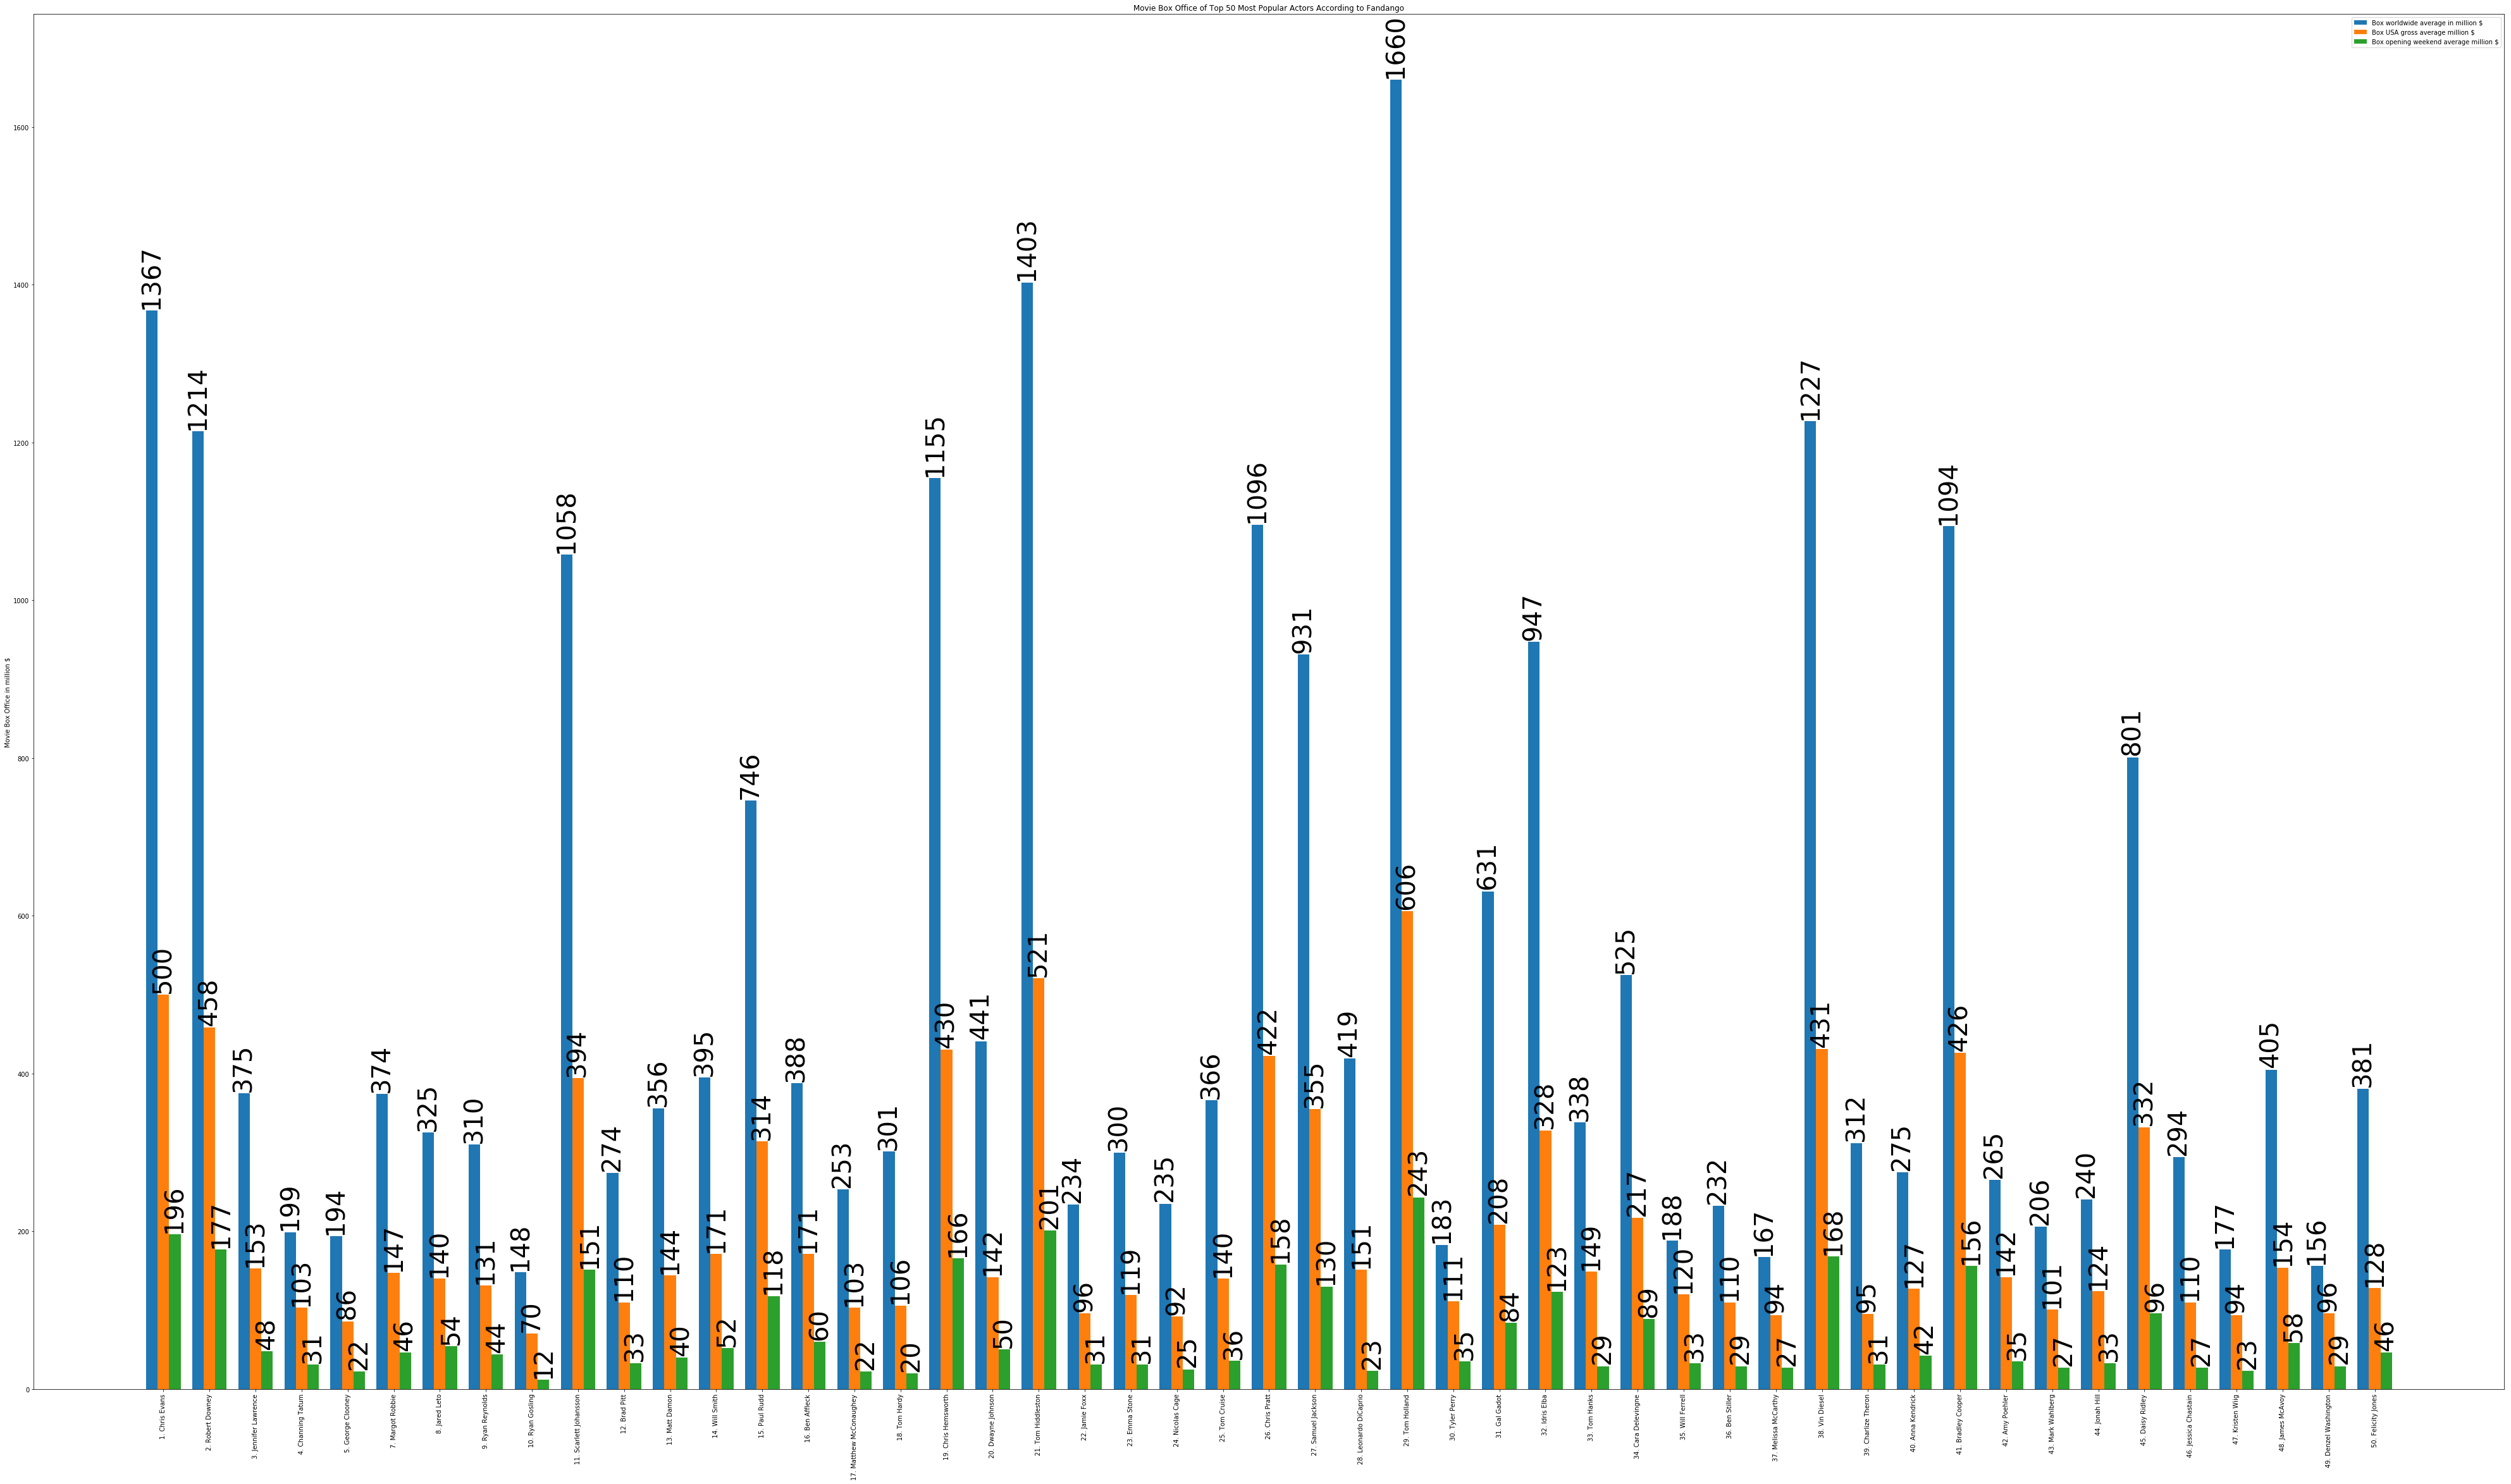

In [111]:
# bar chart for each actor and corresponding box office information
x = np.arange(len(actor_names))  # the label locations
 # the width of the bars

fig, ax = plt.subplots(figsize=(70,40))
rects1 = ax.bar(x - 0.25, avg_bo_ww, width=0.25, align = 'center', label='Box worldwide average in million $')
rects2 = ax.bar(x , avg_bo_ug, width=0.25, align='center', label='Box USA gross average million $')
rects3 = ax.bar(x  + 0.25, avg_bo_op, width=0.25, align='center', label='Box opening weekend average million $')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Movie Box Office in million $')
ax.set_title('Movie Box Office of Top 50 Most Popular Actors According to Fandango')
ax.set_xticks(x)
ax.set_xticklabels(actor_names, rotation = 90)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation = 90)

plt.rcParams.update({'font.size': 40})

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

#plt.savefig('movies_1.png')
# fig.tight_layout()

plt.show()


In [88]:
# select query to average metascore for every movie an actor/actress has made 
# subquery to filter out movies with metascore values of 0 as they
# are undocumnted information on IMDB
curs.execute("""select actor_id, first_name, last_name, pop_rank, round(avg(movies.meta_score), 0)
                from actors
                join moviesxactors
                using (actor_id)
                join movies
                using (title_id)
                where title_id in (select movies.title_id
                                    from movies
                                    where meta_score != 0)
                                    group by actor_id
                                    order by pop_rank""")
# df = pd.DataFrame(curs.fetchall())
# df.columns = [x[0] for x in curs.description]
# df

In [89]:
results_2 = curs.fetchall()

In [90]:
results_2

[('nm0262635', 'Chris', 'Evans', 1, Decimal('62')),
 ('nm0000375', 'Robert', 'Downey', 2, Decimal('64')),
 ('nm2225369', 'Jennifer', 'Lawrence', 3, Decimal('60')),
 ('nm1475594', 'Channing', 'Tatum', 4, Decimal('62')),
 ('nm0000123', 'George', 'Clooney', 5, Decimal('68')),
 ('nm3053338', 'Margot', 'Robbie', 7, Decimal('60')),
 ('nm0001467', 'Jared', 'Leto', 8, Decimal('56')),
 ('nm0005351', 'Ryan', 'Reynolds', 9, Decimal('51')),
 ('nm0331516', 'Ryan', 'Gosling', 10, Decimal('66')),
 ('nm0424060', 'Scarlett', 'Johansson', 11, Decimal('66')),
 ('nm0000093', 'Brad', 'Pitt', 12, Decimal('64')),
 ('nm0000354', 'Matt', 'Damon', 13, Decimal('64')),
 ('nm0000226', 'Will', 'Smith', 14, Decimal('51')),
 ('nm0748620', 'Paul', 'Rudd', 15, Decimal('61')),
 ('nm0000255', 'Ben', 'Affleck', 16, Decimal('53')),
 ('nm0000190', 'Matthew', 'McConaughey', 17, Decimal('59')),
 ('nm0362766', 'Tom', 'Hardy', 18, Decimal('66')),
 ('nm1165110', 'Chris', 'Hemsworth', 19, Decimal('64')),
 ('nm0425005', 'Dwayne', 

In [91]:
metascore = loops_for_int(results_2, 4)

In [92]:
metascore

[62,
 64,
 60,
 62,
 68,
 60,
 56,
 51,
 66,
 66,
 64,
 64,
 51,
 61,
 53,
 59,
 66,
 64,
 51,
 69,
 54,
 56,
 51,
 60,
 66,
 60,
 68,
 71,
 47,
 55,
 59,
 66,
 42,
 52,
 54,
 51,
 64,
 54,
 58,
 60,
 51,
 55,
 66,
 65,
 62,
 64,
 59,
 62,
 55]

In [ ]:
# bar chart plot of each actor and their average metascore for movies they made
x = np.arange(len(actor_names))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(70,40))
rects1 = ax.bar(x - width/2, metascore, width, label='Average Metascore')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Movie metascore (out of 100)')
ax.set_ylim(bottom=35)
ax.set_title('Movie metascore Average of Top 50 Most Popular Actor According to Fandango')
ax.set_xticks(x)
ax.set_xticklabels(actor_names, rotation = 90)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation= 90)

plt.rcParams.update({'font.size': 40})

autolabel(rects1)
plt.savefig('movies_3.png')
# fig.tight_layout()

plt.show()

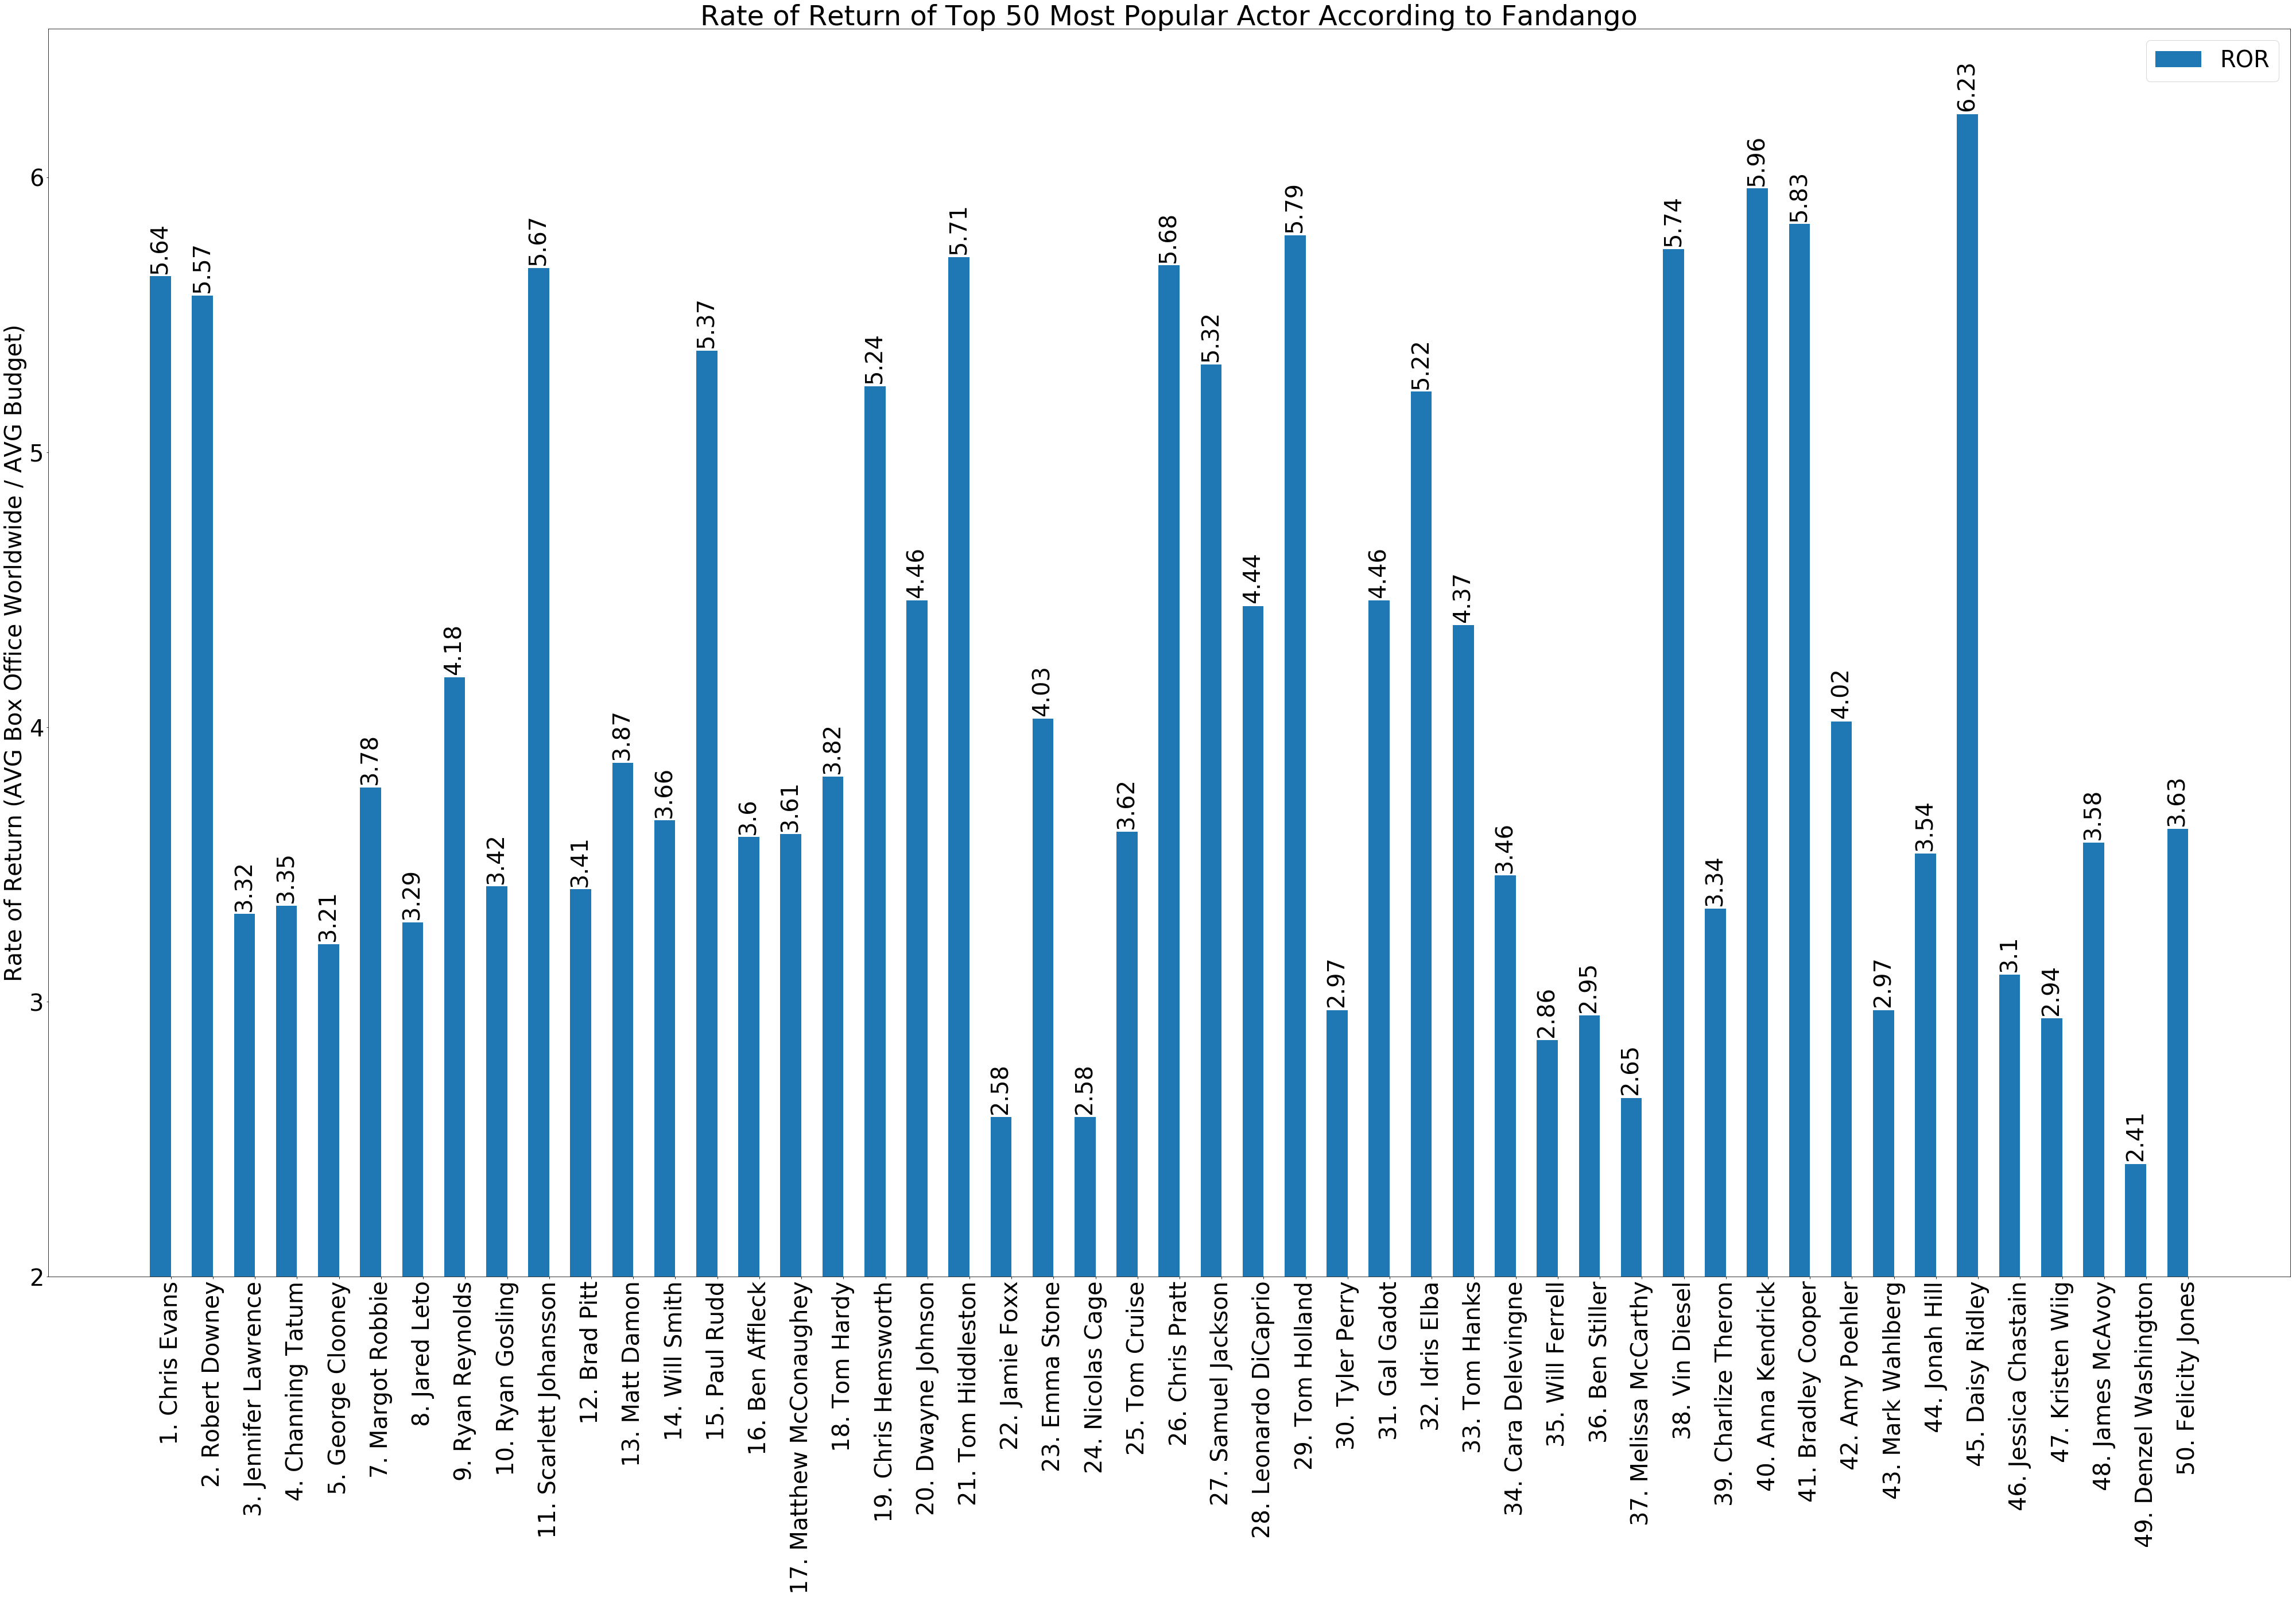

In [93]:
# bar chart plot of each actor/actress box office worldwide average/budget average
x = np.arange(len(actor_names))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(70,40))
rects1 = ax.bar(x - width/2, ROR, width, label='ROR')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Rate of Return (AVG Box Office Worldwide / AVG Budget)')
ax.set_ylim(bottom=2)
ax.set_title('Rate of Return of Top 50 Most Popular Actor According to Fandango')
ax.set_xticks(x)
ax.set_xticklabels(actor_names, rotation = 90)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation= 90)

plt.rcParams.update({'font.size': 40})

autolabel(rects1)
# plt.savefig('movies_4.png')
# fig.tight_layout()

plt.show()

In [113]:
# tables created below to show top 10 actors with top fandango ranking and social media following
curs.execute("""select actor_id, first_name, last_name, pop_rank, social_rank
                from actors
                where social_rank != 0
                order by social_rank desc""")

results_4 = curs.fetchall()

In [ ]:
results_4

In [ ]:
social_media_rank_list = []
counter = 1
for actor in results_4:
    social_media_rank_list.append(f'{counter}. {actor[1]} {actor[2]}')
    counter += 1
    

In [146]:

curs.execute("""select first_name, last_name, pop_rank, social_rank
                from actors
                order by pop_rank asc
                limit 10""")

df = pd.DataFrame(curs.fetchall())
df.columns = [x[0] for x in curs.description]
df

,first_name,last_name,pop_rank,social_rank
0,Chris,Evans,1,8637437
1,Robert,Downey,2,0
2,Jennifer,Lawrence,3,16641759
3,Channing,Tatum,4,0
4,George,Clooney,5,0
5,Johnny,Depp,6,15439258
6,Margot,Robbie,7,0
7,Jared,Leto,8,0
8,Ryan,Reynolds,9,0
9,Ryan,Gosling,10,0


In [148]:
curs.execute("""select first_name, last_name, pop_rank, social_rank
                from actors
                order by social_rank desc
                limit 10""")

df = pd.DataFrame(curs.fetchall())
df.columns = [x[0] for x in curs.description]
df

,first_name,last_name,pop_rank,social_rank
0,Vin,Diesel,38,100423198
1,Will,Smith,14,76930952
2,Dwayne,Johnson,20,70837131
3,Leonardo,DiCaprio,28,36258943
4,Tyler,Perry,30,18854507
5,Tom,Cruise,25,18475521
6,Jennifer,Lawrence,3,16641759
7,Johnny,Depp,6,15439258
8,Tom,Hanks,33,15312277
9,Will,Ferrell,35,10114538
